In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
test=pd.read_csv('test_agriculture1.csv')
train=pd.read_csv('train_agriculture.csv')

In [3]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
train.shape,test.shape

((4599, 10), (1199, 9))

UNDERSTANDING THE COLUMNS

ID = UNIQUEID
Estimated_Insects_Count=Estimated_Insects_CountS PER SQUARE METER
Crop_Type=CATEGORIZED AS 0 AND 1
Soil_Type=CATEGORIZED AS 0 AND 1
Pesticide_Use_Category=type of pesticies uses (1=never used,2=previously used,3=currently using)
Number_Doses_Week=number of doses per week
Number_Weeks_Used=number of weeks used
Number_Weeks_Quit=number of weeks wuit
Season= seasons categorised as 1,2,3
Crop_Damage=categorised as (0=the crop is healthy (alive),1= damaged by pesticides,2= damaged by other reasonsaa

EDA

In [6]:
train['Crop_Damage'].value_counts()


0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [7]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [8]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


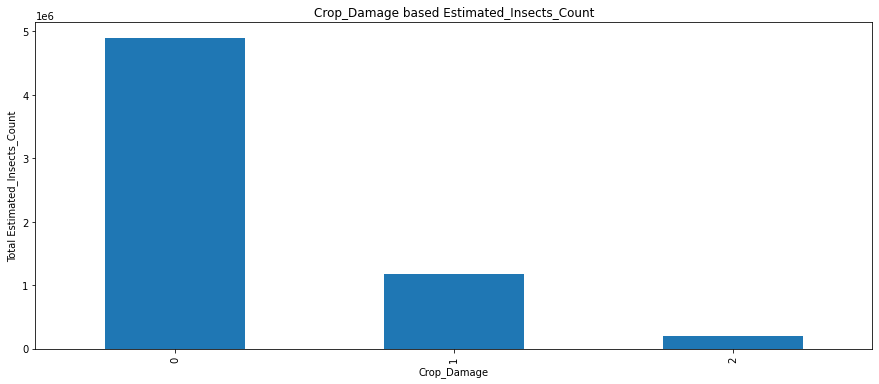

Crop_Damage
0    4898585
1    1176775
2     193079
Name: Estimated_Insects_Count, dtype: int64


In [11]:
plt.subplots(figsize = (15, 6))
Estimated_Insects_Count = train.groupby('Crop_Damage').sum()
pt = Estimated_Insects_Count['Estimated_Insects_Count'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Crop_Damage')
ax.set_ylabel('Total Estimated_Insects_Count')
ax.set_title('Crop_Damage based Estimated_Insects_Count')
plt.show()
print(pt)

we can understand estimated insect count is highest in category 0=the crop is healthy (alive)=4898585 count, 1=damaged by Estimated_Insects_Count=1176775 count of insects and  2=damaged by other reasonsEstimated_Insects_Count=193079

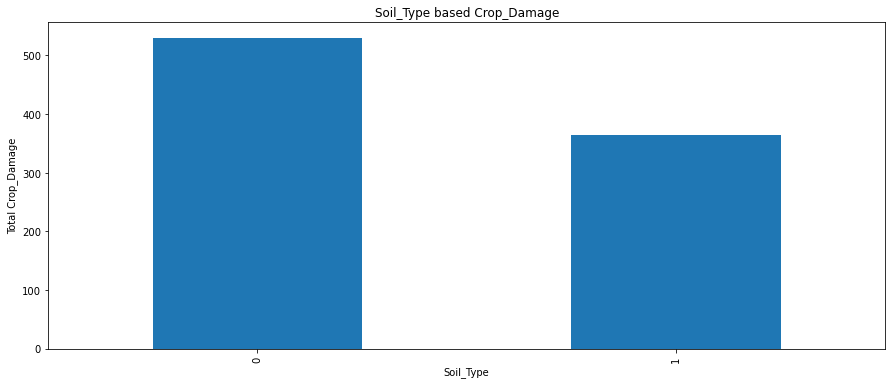

Soil_Type
0    530
1    364
Name: Crop_Damage, dtype: int64


In [12]:
plt.subplots(figsize = (15, 6))
Crop_Damage = train.groupby('Soil_Type').sum()
pt = Crop_Damage['Crop_Damage'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Soil_Type')
ax.set_ylabel('Total Crop_Damage')
ax.set_title('Soil_Type based Crop_Damage')
plt.show()
print(pt)

0 category soil type has highest crop damage of 530 counts compared to soil type2 which counts around 364

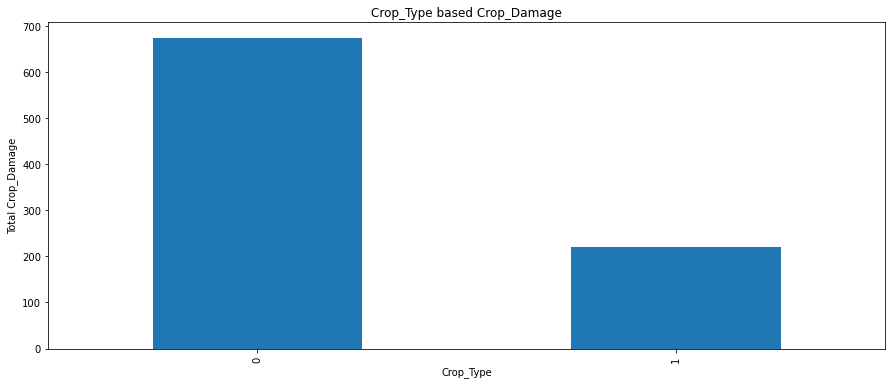

Crop_Type
0    674
1    220
Name: Crop_Damage, dtype: int64


In [13]:
plt.subplots(figsize = (15, 6))
Crop_Damage = train.groupby('Crop_Type').sum()
pt = Crop_Damage['Crop_Damage'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Crop_Type')
ax.set_ylabel('Total Crop_Damage')
ax.set_title('Crop_Type based Crop_Damage')
plt.show()
print(pt)

while understanding on how crops have been damaged among types of crops we can conclude
crop type 0 has the highest count of 674 compared to crop type 1 =220

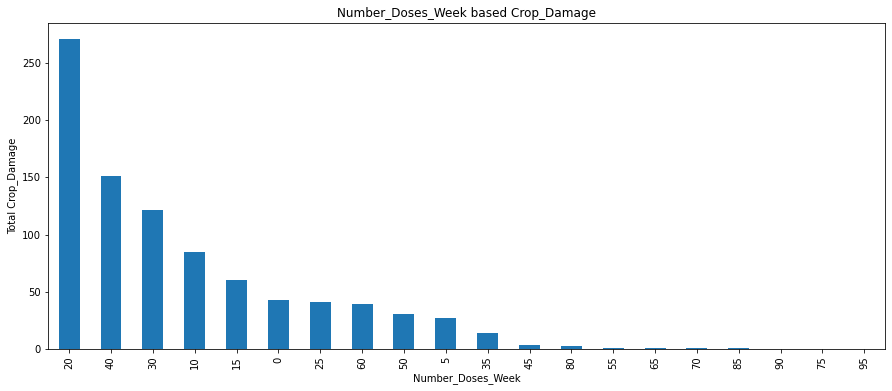

Number_Doses_Week
20    271
40    151
30    121
10     85
15     60
0      43
25     41
60     39
50     31
5      27
35     14
45      4
80      3
55      1
65      1
70      1
85      1
90      0
75      0
95      0
Name: Crop_Damage, dtype: int64


In [14]:

plt.subplots(figsize = (15, 6))
Crop_Damage = train.groupby('Number_Doses_Week').sum()
pt = Crop_Damage['Crop_Damage'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Number_Doses_Week')
ax.set_ylabel('Total Crop_Damage')
ax.set_title('Number_Doses_Week based Crop_Damage')
plt.show()
print(pt)

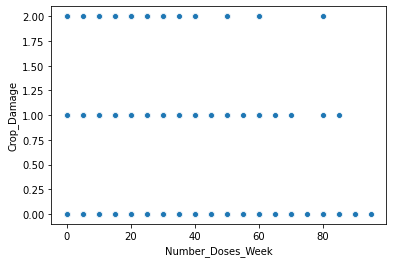

In [15]:
sns.scatterplot(x="Number_Doses_Week",y="Crop_Damage",data=train)

we can observe  crop is healthy caetgory has highest number of doses per week hence we can conclude higher doses high chance the crop is alive

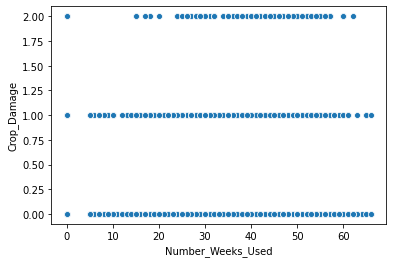

In [16]:
sns.scatterplot(x="Number_Weeks_Used",y="Crop_Damage",data=train)


we can understand that Number_Weeks_Used is similar in category 0 & 1 of crop damage,hence crop being alive or daamge due to insects are impacted due to Number_Weeks_Used

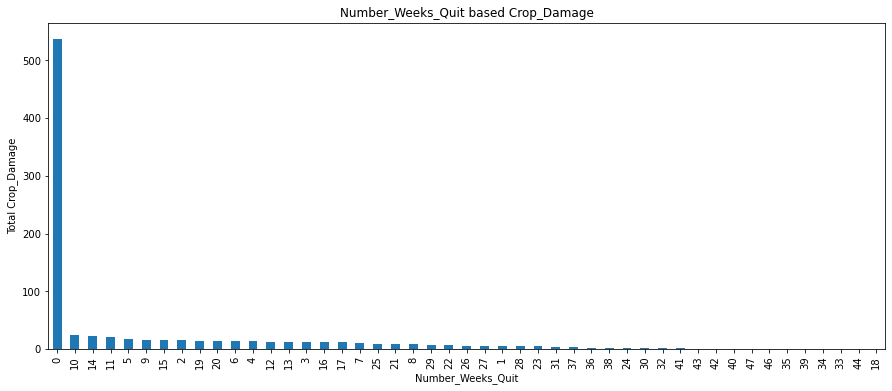

Number_Weeks_Quit
0     538
10     24
14     23
11     21
5      17
9      16
15     15
2      15
19     14
20     14
6      14
4      14
12     13
13     13
3      13
16     13
17     12
7      11
25      9
21      9
8       9
29      7
22      7
26      6
27      6
1       6
28      6
23      5
31      3
37      3
36      2
38      2
24      2
30      2
32      2
41      2
43      1
42      1
40      1
47      1
46      1
35      1
39      0
34      0
33      0
44      0
18      0
Name: Crop_Damage, dtype: int64


In [17]:
plt.subplots(figsize = (15, 6))
Crop_Damage = train.groupby('Number_Weeks_Quit').sum()
pt = Crop_Damage['Crop_Damage'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Number_Weeks_Quit')
ax.set_ylabel('Total Crop_Damage')
ax.set_title('Number_Weeks_Quit based Crop_Damage')
plt.show()
print(pt)

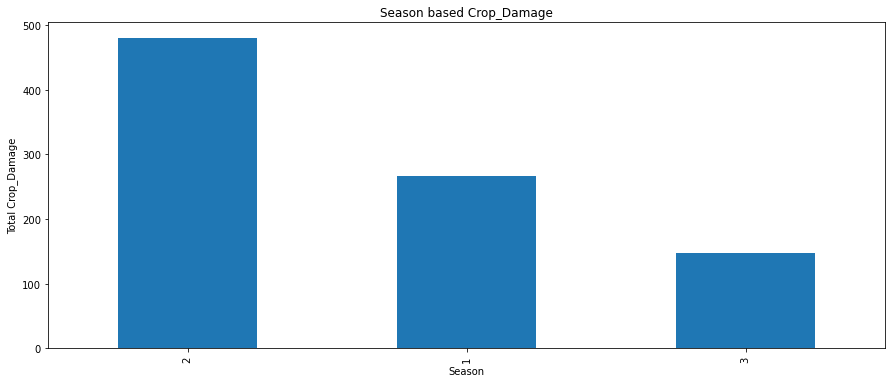

Season
2    480
1    266
3    148
Name: Crop_Damage, dtype: int64


In [18]:
plt.subplots(figsize = (15, 6))
Crop_Damage = train.groupby('Season').sum()
pt = Crop_Damage['Crop_Damage'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Season')
ax.set_ylabel('Total Crop_Damage')
ax.set_title('Season based Crop_Damage')
plt.show()
print(pt)

crop damage is highest in season 2, where we can find 480 crops damaged while in case season 1 crop damage has reduced to half of season 2 which counts to 266 and in season 3 we have least crop damage of 148

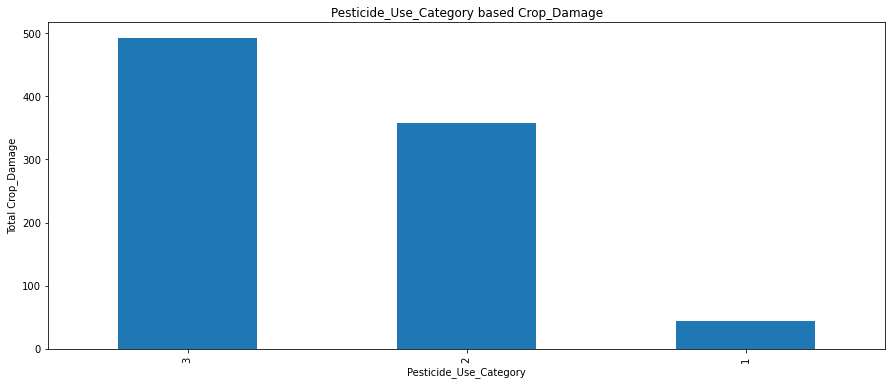

Pesticide_Use_Category
3    493
2    358
1     43
Name: Crop_Damage, dtype: int64


In [19]:
plt.subplots(figsize = (15, 6))
Crop_Damage = train.groupby('Pesticide_Use_Category').sum()
pt = Crop_Damage['Crop_Damage'].sort_values(ascending = False)

ax = pt.plot.bar()

ax.set_xlabel('Pesticide_Use_Category')
ax.set_ylabel('Total Crop_Damage')
ax.set_title('Pesticide_Use_Category based Crop_Damage')
plt.show()
print(pt)

Pesticide_Use_Category 3 has highest crop damage around 493 followed by category 2 with 358 crops damage and least crop damage iss found while using pestide category3 
hence pesticide category 3 is recommendable

SUMMARY STATISTICS

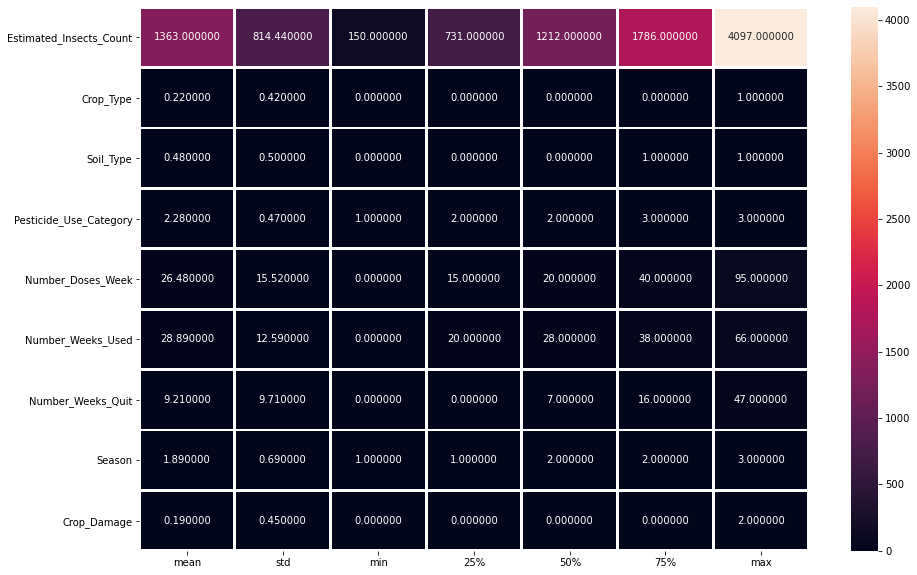

In [20]:
train.describe()

plt.figure(figsize=(15,10))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

plt.show()

to understand the data spread over,we can narrate it with the help of describe option which tells
1.distribution of mean and median has variations in number of weeks quit,number of dose per week data,where as allother data is normal
2.mean and std data number of weeks quit,number of dose per week,pesticide used category and estimated insect count data has variations and all other columns data in normally distributed
3.min and Q1 data has deviations in number of weeks quit,number of weeks used and estimated insect count has dispersion 

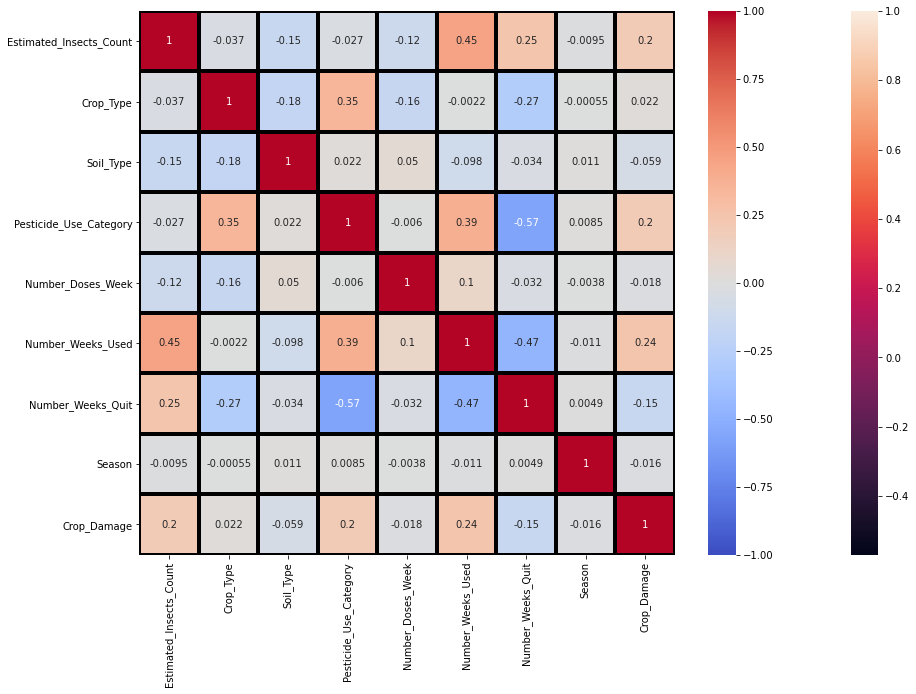

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(train.corr())
sns.heatmap(train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

Text(0.5, 1.0, 'correlation with target variables')

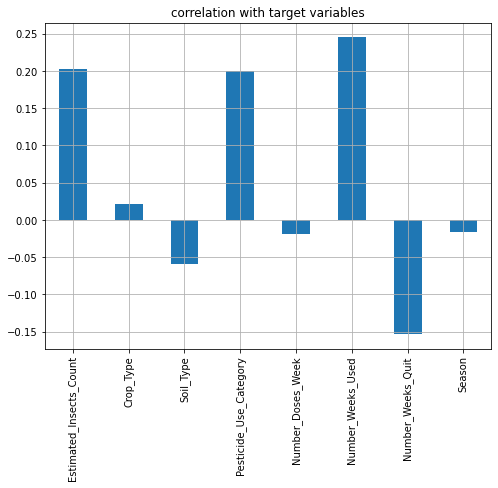

In [22]:
plt.figure(figsize=(8,6))
train.drop('Crop_Damage',axis=1).corrwith(train['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("correlation with target variables")



correlation of of all columns with target variable analysis is as follows
highly positive correlation is found in:-number of weeks used=23%pesticides use count and estimated insect count at 20% 
highly negative correlation is between crop damage and:-
    number of weeks quit=15% and soil type=5.9%
all other attributes have low or minimal crrelation with crops damaged

In [23]:
# join test and train data


In [24]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [25]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,train_or_test
0,F00000001,188,1,0,1,0,0.0,0,1,0.0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1.0,train
2,F00000004,257,1,0,1,0,0.0,0,2,1.0,train
3,F00000005,257,1,1,1,0,0.0,0,2,1.0,train
4,F00000006,342,1,0,1,0,0.0,0,2,1.0,train


In [26]:
df.shape

(5798, 11)

In [27]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
train_or_test                 0
dtype: int64

In [28]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mode()[0])

In [29]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
train_or_test                 0
dtype: int64

In [30]:
 for col in ['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']:
    df = pd.get_dummies(df, columns=[col])

In [31]:
df.head()

,ID,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,train_or_test,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,F00000001,188,0,0.0,0,0.0,train,0,1,1,0,1,0,0,1,0,0
1,F00000003,209,0,0.0,0,1.0,train,0,1,1,0,1,0,0,0,1,0
2,F00000004,257,0,0.0,0,1.0,train,0,1,1,0,1,0,0,0,1,0
3,F00000005,257,0,0.0,0,1.0,train,0,1,0,1,1,0,0,0,1,0
4,F00000006,342,0,0.0,0,1.0,train,0,1,1,0,1,0,0,0,1,0


Estimated_Insects_Count         AxesSubplot(0.125,0.71587;0.168478x0.16413)
Number_Doses_Week            AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Number_Weeks_Used            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Number_Weeks_Quit            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Crop_Damage                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
Crop_Type_0                 AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Crop_Type_1                 AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Soil_Type_0                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Soil_Type_1                    AxesSubplot(0.125,0.321957;0.168478x0.16413)
Pesticide_Use_Category_1    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Pesticide_Use_Category_2    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Pesticide_Use_Category_3    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Season_1                          AxesSubplot(0.125,0.125;0.168478x0.16413)
Season_2    

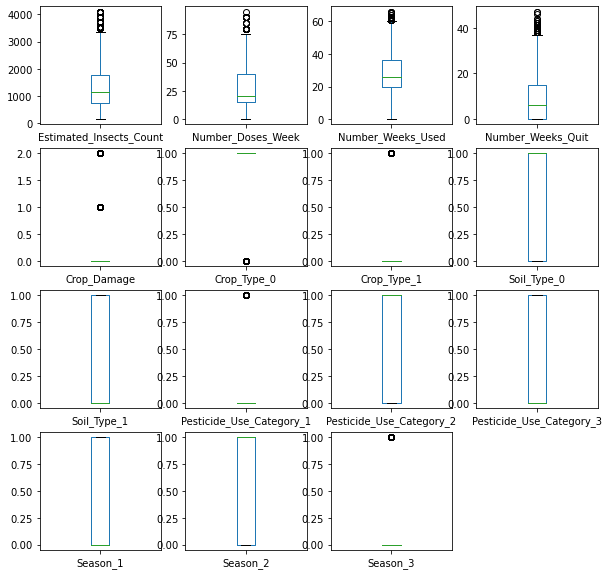

In [32]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

we can observe outliers in crop_type the data is not normally distributed between RANGE Number_Doses_Week has outliers present between 0-2.5 and also max Q3 has large variations Number_Week_Used has outliers present between 7.5 and 10 Crop_Damage have outliers also data has not been normally distributed

In [33]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
train.drop('ID',axis=1,inplace=True)
train.head()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage,Crop_Type_0,Crop_Type_1,Soil_Type_0,Soil_Type_1,Pesticide_Use_Category_1,Pesticide_Use_Category_2,Pesticide_Use_Category_3,Season_1,Season_2,Season_3
0,188,0,0.0,0,0.0,0,1,1,0,1,0,0,1,0,0
1,209,0,0.0,0,1.0,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1.0,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,1.0,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,1.0,0,1,1,0,1,0,0,0,1,0


In [35]:
test.drop(['ID','Crop_Damage'],axis=1,inplace=True)
test.shape

(1199, 14)

In [36]:
x= train.drop(["Crop_Damage"], axis=1).values

x

array([[1.880e+02, 0.000e+00, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.090e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.570e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.267e+03, 1.000e+01, 7.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.267e+03, 1.000e+01, 2.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.267e+03, 1.000e+01, 3.300e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [37]:
 y= train["Crop_Damage"].values
    


In [38]:
x.shape,y.shape

((4599, 14), (4599,))

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [41]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3679, 14), (3679,), (920, 14), (920,))

importing models and metrics for analysis

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [43]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

In [54]:
parameters={'C':[1,10],'random_state':range(50,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 1, 'random_state': 50}


In [55]:
lr=LogisticRegression(C=1,random_state=50)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8369565217391305
[[755   9   0]
 [118  15   0]
 [ 21   2   0]]
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       764
         1.0       0.58      0.11      0.19       133
         2.0       0.00      0.00      0.00        23

    accuracy                           0.84       920
   macro avg       0.47      0.37      0.37       920
weighted avg       0.78      0.84      0.78       920



In [56]:
#CROSS VALIDATE LOGISTIC REGRESSION

In [57]:
score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.80217391 0.83043478 0.84456522 0.82717391 0.83351469]
Mean : 0.8275725031934522
Std: 0.01398214445352518


In [58]:
#USING GRIDSEARCHCV TO FIND OUT THE BEST PARAMETER IN SVM

In [46]:
parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':range(50,100)}
svc=SVC()

In [ ]:
#CROSS VALIDATE SVC

In [ ]:
score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

In [ ]:
#GAUSSIANNB

In [44]:
parameters={'var_smoothing':np.logspace(0,-9,num=100)}
gnb=GaussianNB()

In [45]:
clf=GridSearchCV(gnb,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'var_smoothing': 1.0}


In [46]:
gnb=GaussianNB(var_smoothing=1)
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8347826086956521
[[760   4   0]
 [125   8   0]
 [ 23   0   0]]
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       764
         1.0       0.67      0.06      0.11       133
         2.0       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.50      0.35      0.34       920
weighted avg       0.79      0.83      0.77       920



In [67]:
score=cross_val_score(gnb,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.80108696 0.83043478 0.84456522 0.82826087 0.83133841]
Mean : 0.827137247480721
Std: 0.014227704216331674


In [47]:
#DECISION TREE CLASSIFIER

In [48]:
parameters={'criterion' : ("gini",'entropy'),'random_state': range(50,70)}
dt=DecisionTreeClassifier()

In [49]:
clf=GridSearchCV(dt,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 63}


In [50]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=63)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7652173913043478
[[667  83  14]
 [ 92  35   6]
 [ 15   6   2]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       764
         1.0       0.28      0.26      0.27       133
         2.0       0.09      0.09      0.09        23

    accuracy                           0.77       920
   macro avg       0.41      0.41      0.41       920
weighted avg       0.76      0.77      0.76       920



In [51]:
#CROSS VALIDATE DecisionTreeClassifier

In [52]:
score=cross_val_score(dt,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.68586957 0.72608696 0.73695652 0.6826087  0.76713819]
Mean : 0.7197319865638454
Std: 0.031966297992420414


In [53]:
#KNeighborsClassifier()

In [54]:
parameters={'n_neighbors':range(5,12),'leaf_size':range(1,5),'algorithm':('auto','ball_tree','kd_tree','brute')}
knn=KNeighborsClassifier()

In [55]:
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 10}


In [57]:
knn=KNeighborsClassifier(algorithm='auto',leaf_size=1,n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8304347826086956
[[747  17   0]
 [116  17   0]
 [ 21   2   0]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       764
         1.0       0.47      0.13      0.20       133
         2.0       0.00      0.00      0.00        23

    accuracy                           0.83       920
   macro avg       0.44      0.37      0.37       920
weighted avg       0.77      0.83      0.78       920



In [58]:
#CROSS VALIDATE KNeighborsClassifier

In [59]:
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.78586957 0.82826087 0.8173913  0.83043478 0.83677911]
Mean : 0.8197471258929838
Std: 0.018055676420580223


In [60]:
#RandomForestClassifier

In [61]:
parameters={'criterion':('gini','entropy'),'n_estimators':range(1,10),'min_samples_leaf':range(1,5),'random_state': range(50,70)}
rf=RandomForestClassifier()

In [62]:
clf=GridSearchCV(rf,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 3, 'n_estimators': 9, 'random_state': 63}


In [64]:
rf=RandomForestClassifier(criterion= 'entropy', min_samples_leaf = 3, n_estimators = 9, random_state= 63)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8358695652173913
[[748  15   1]
 [111  21   1]
 [ 19   4   0]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       764
         1.0       0.53      0.16      0.24       133
         2.0       0.00      0.00      0.00        23

    accuracy                           0.84       920
   macro avg       0.46      0.38      0.38       920
weighted avg       0.78      0.84      0.79       920



In [65]:
#CROSS VALIDATE RandomForestClassifier

In [66]:
score=cross_val_score(rf,x,y,cv=5,scoring='accuracy')

print(score)
print('Mean :',score.mean())
print('Std:',score.std())

[0.80652174 0.82065217 0.83043478 0.83152174 0.82916213]
Mean : 0.8236585135071202
Std: 0.009388770726096006


In [68]:
#plotting confusion matrix for random forest classifier since it has highest accuracy of 83.56%

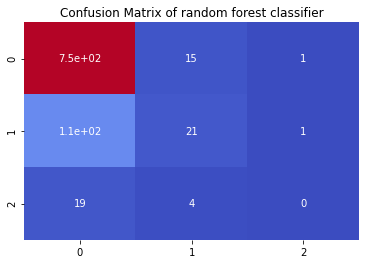

In [69]:
cm=confusion_matrix(y_test,predrf)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of random forest classifier")
plt.show()

In [80]:
#since we have multiple class target we will not be able to auc roc curve for analysis

SERIALIZATION

In [82]:
import pickle
filename='inhouse_newagriculture.csv.pkl'

In [83]:
pickle.dump(rf,open(filename,'wb'))

CONCLUSION

In [85]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))

In [86]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [87]:
df_final

,original,predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
915,0.0,0.0
916,0.0,0.0
917,0.0,0.0
918,0.0,0.0


From the above table the model is predicted the values with 83.5% accuracy